In [64]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from collections import Counter
from imblearn.over_sampling import RandomOverSampler,SMOTE,SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)
from catboost import CatBoostClassifier
import random
from sklearn.neighbors import NearestNeighbors

In [65]:
place = 'try1.txt'
train = pd.read_csv(place, sep='\t')
print(train.shape)

(7939, 45)


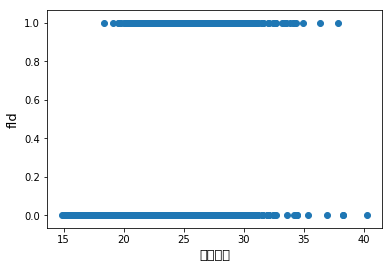

In [66]:
fig, ax = plt.subplots()
ax.scatter(x = train['体重指数'], y = train['fld'])
plt.ylabel('fld', fontsize=13)
plt.xlabel('体重指数', fontsize=13)
plt.show()

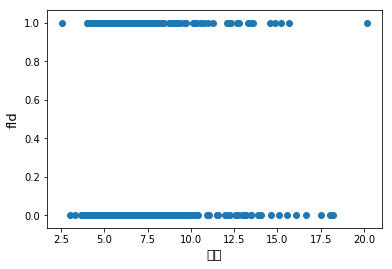

In [67]:
fig, ax = plt.subplots()
ax.scatter(x = train['血糖'], y = train['fld'])
plt.ylabel('fld', fontsize=13)
plt.xlabel('血糖', fontsize=13)
plt.show()

In [68]:
y = train['fld']
train = train.drop(['fld'],axis=1)
print(np.sum(y==0))
print(np.sum(y==1))

6992
947


No handles with labels found to put in legend.


<Figure size 720x576 with 0 Axes>

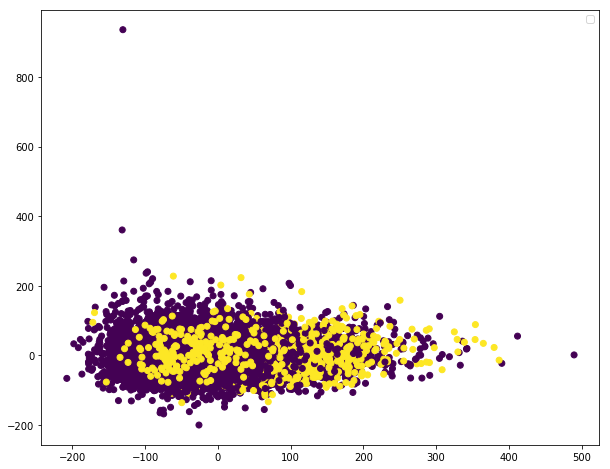

In [80]:
model_pca = PCA(n_components=2)
X_pca = model_pca.fit(train).transform(train)
fig = plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1],marker='o',c=y)
plt.legend()
plt.show()

In [70]:
model_pca.explained_variance_ratio_.sum()

0.8223878367991975

In [95]:
place = 'try1.txt'
train = pd.read_csv(place, sep='\t')
y = train['fld']
A1 = y[y==1].index
A2 = y[y==0].index
X1 = train.iloc[A1,:]
X2 = train.iloc[A2,:]

In [98]:
X2.shape

(6992, 45)

In [101]:
data_pca = PCA(n_components=10).fit_transform(X1)
X_tsne = TSNE(n_components=2).fit_transform(data_pca)
fig = plt.figure(figsize=(10,8))

In [110]:
X_1 = pd.DataFrame(X_tsne)
X_1['age'] = np.array(X1['age'])
X_1.head()

,0,1,age
0,-23.608057,9.534686,1
1,32.371506,-3.363507,1
2,56.930870,-2.024871,1
3,39.882858,14.758946,1
4,40.706730,14.383597,1


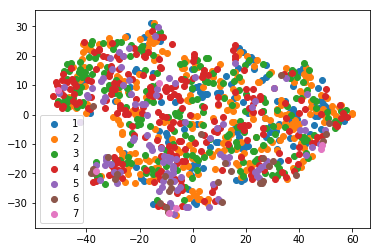

In [139]:
B1 = X_1[X_1['age']==1]
plt.scatter(B1[0],B1[1],label=1)

B2 = X_1[X_1['age']==2]
plt.scatter(B2[0],B2[1],label=2)

B3 = X_1[X_1['age']==3]
plt.scatter(B3[0],B3[1],label=3)

B4 = X_1[X_1['age']==4]
plt.scatter(B4[0],B4[1],label=4)

B5 = X_1[X_1['age']==5]
plt.scatter(B5[0],B5[1],label=5)

B6 = X_1[X_1['age']==6]
plt.scatter(B6[0],B6[1],label=6)

B7 = X_1[X_1['age']==7]
plt.scatter(B7[0],B7[1],label=7)

plt.legend()
plt.show()

In [144]:
data_pca = PCA(n_components=10).fit_transform(X2)
X_tsne = TSNE(n_components=2).fit_transform(data_pca)
fig = plt.figure(figsize=(10,8))

In [145]:
X_2 = pd.DataFrame(X_tsne)
X_2['age'] = np.array(X2['age'])
X_2.head()

,0,1,age
0,-45.306446,-2.073715,1
1,-80.067093,2.294622,1
2,-35.155701,9.375119,1
3,-54.134018,-15.284584,1
4,-48.591145,12.100399,1


<Figure size 720x576 with 0 Axes>

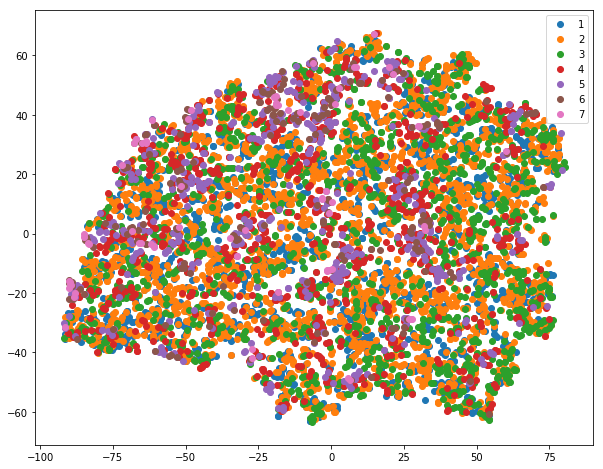

In [146]:
B1 = X_2[X_2['age']==1]
plt.scatter(B1[0],B1[1],label=1)

B2 = X_2[X_2['age']==2]
plt.scatter(B2[0],B2[1],label=2)

B3 = X_2[X_2['age']==3]
plt.scatter(B3[0],B3[1],label=3)

B4 = X_2[X_2['age']==4]
plt.scatter(B4[0],B4[1],label=4)

B5 = X_2[X_2['age']==5]
plt.scatter(B5[0],B5[1],label=5)

B6 = X_2[X_2['age']==6]
plt.scatter(B6[0],B6[1],label=6)

B7 = X_2[X_2['age']==7]
plt.scatter(B7[0],B7[1],label=7)

plt.legend()
plt.show()

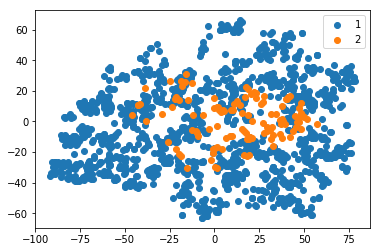

In [148]:
B1 = X_2[X_2['age']==1]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==1]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

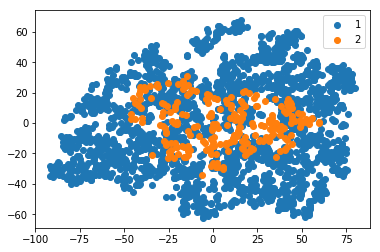

In [149]:
B1 = X_2[X_2['age']==2]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==2]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

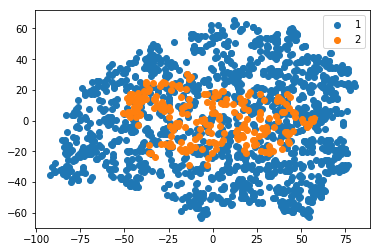

In [150]:
B1 = X_2[X_2['age']==3]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==3]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

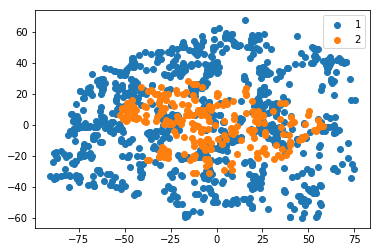

In [151]:
B1 = X_2[X_2['age']==4]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==4]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

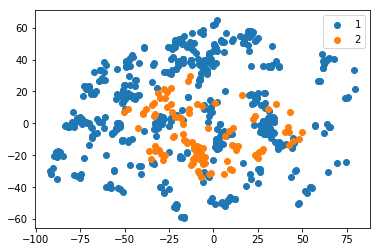

In [152]:
B1 = X_2[X_2['age']==5]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==5]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

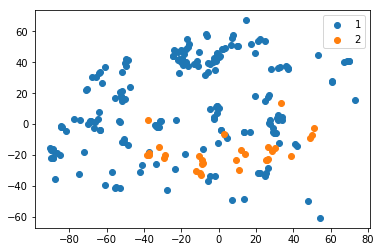

In [153]:
B1 = X_2[X_2['age']==6]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==6]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

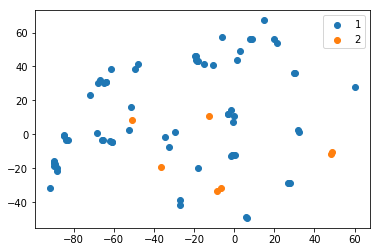

In [154]:
B1 = X_2[X_2['age']==7]
plt.scatter(B1[0],B1[1],label=1)

B1 = X_1[X_1['age']==7]
plt.scatter(B1[0],B1[1],label=2)

plt.legend()
plt.show()

# BMI

In [156]:
data_pca = PCA(n_components=10).fit_transform(X1)
X_tsne = TSNE(n_components=2).fit_transform(data_pca)
fig = plt.figure(figsize=(10,8))
X_1 = pd.DataFrame(X_tsne)
X_1['bmi'] = np.array(X1['bmi2'])
X_1.head()

,0,1,bmi
0,-9.686660,-23.241941,2
1,2.329942,31.569246,4
2,-0.093860,55.787796,3
3,-15.848205,37.238766,2
4,-15.542895,38.083820,2


In [158]:
data_pca = PCA(n_components=10).fit_transform(X2)
X_tsne = TSNE(n_components=2).fit_transform(data_pca)
fig = plt.figure(figsize=(10,8))
X_2 = pd.DataFrame(X_tsne)
X_2['bmi'] = np.array(X2['bmi2'])
X_2.head()

,0,1,bmi
0,-15.990516,-41.485363,3
1,-23.386456,-74.616600,2
2,-1.494910,-35.865749,2
3,-31.906096,-45.034874,2
4,-4.436139,-49.552994,3


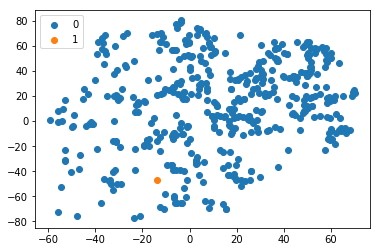

In [162]:
B1 = X_2[X_2['bmi']==1]
plt.scatter(B1[0],B1[1],label=0)

B1 = X_1[X_1['bmi']==1]
plt.scatter(B1[0],B1[1],label=1)

plt.legend()
plt.show()

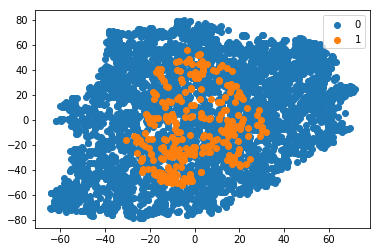

In [163]:
B1 = X_2[X_2['bmi']==2]
plt.scatter(B1[0],B1[1],label=0)

B1 = X_1[X_1['bmi']==2]
plt.scatter(B1[0],B1[1],label=1)

plt.legend()
plt.show()

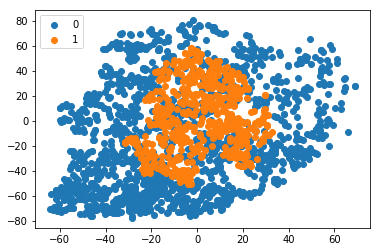

In [164]:
B1 = X_2[X_2['bmi']==3]
plt.scatter(B1[0],B1[1],label=0)

B1 = X_1[X_1['bmi']==3]
plt.scatter(B1[0],B1[1],label=1)

plt.legend()
plt.show()

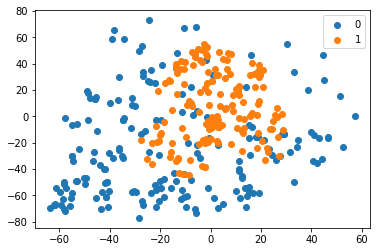

In [165]:
B1 = X_2[X_2['bmi']==4]
plt.scatter(B1[0],B1[1],label=0)

B1 = X_1[X_1['bmi']==4]
plt.scatter(B1[0],B1[1],label=1)

plt.legend()
plt.show()